## Predicting heart disease using Machine Learning


#### Approach:
1, Problem Definition
2, Data
3, Evaluation
4, Feature

##### Problem definition:
        ->With the given patients data we are going to predict if that patient has a heart disease or not?

##### Data:
        ->The original Data came from the cleavland data from the UCI Machine learning repository.
        link :https://archive.ics.uci.edu/dataset/45/heart+disease
        ->There's also a version available on kaggle.
        link :https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

##### Evaluation:
        ->If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.
        
##### Features:
    Column Descriptions:

        ->id: (Unique id for each patient)
        ->age: (Age of the patient in years)
        ->origin: (place of study)
        ->sex: (Male/Female)
        ->cp: chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
        ->trestbps: resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
        ->chol: (serum cholesterol in mg/dl)
        ->fbs: (if fasting blood sugar > 120 mg/dl)
        ->restecg: (resting electrocardiographic results)

        ->thalach: maximum heart rate achieved
        ->exang: exercise-induced angina (True/ False)
        ->oldpeak: ST depression induced by exercise relative to rest
        ->slope: the slope of the peak exercise ST segment
        ->ca: number of major vessels (0-3) colored by fluoroscopy
        ->thal: [normal; fixed defect; reversible defect]
        ->target




In [227]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV  
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
from sklearn.metrics import roc_curve

ImportError: cannot import name 'cross_val_score' from 'sklearn.metrics' (C:\Users\dilip\miniconda3\Lib\site-packages\sklearn\metrics\__init__.py)

### Load Data

In [5]:
heart=pd.read_csv('heart_disease.csv')
heart.shape

(303, 14)

#### Data Exploration (exploratory data analysis or EDA)

1, What questions we are trying to solve?
2, What kind of data do we have and how do we treat different type?
3, What's missing from the data and how do we deal with it?
4, Where are the outliers and why should we care about them?
5, How can you add, change or remove features to get more out of your data?

In [6]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='target'>

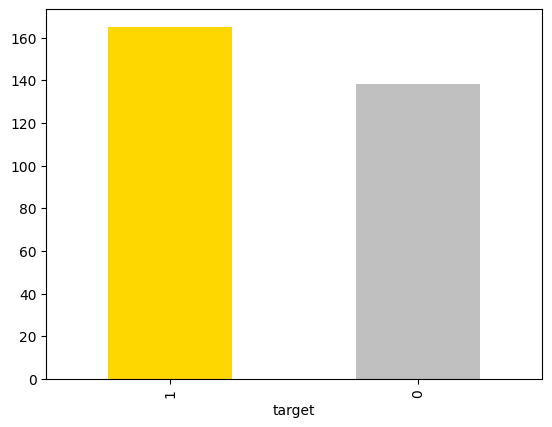

In [8]:
heart['target'].value_counts().plot(kind='bar',color=['gold','silver'])

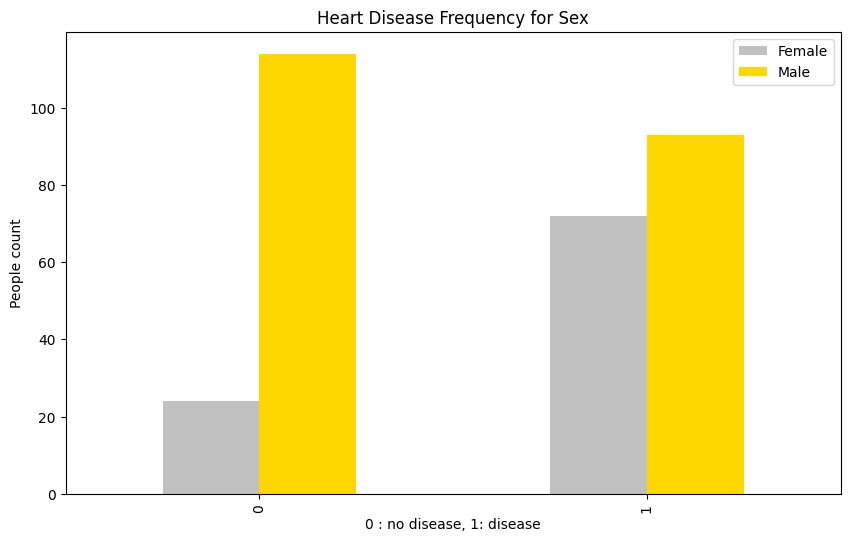

In [9]:
pd.crosstab(heart.target,heart.sex).plot(kind='bar',figsize=(10,6),color=['silver','gold'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 : no disease, 1: disease')
plt.ylabel('People count')
plt.legend(['Female','Male'])
plt.show()

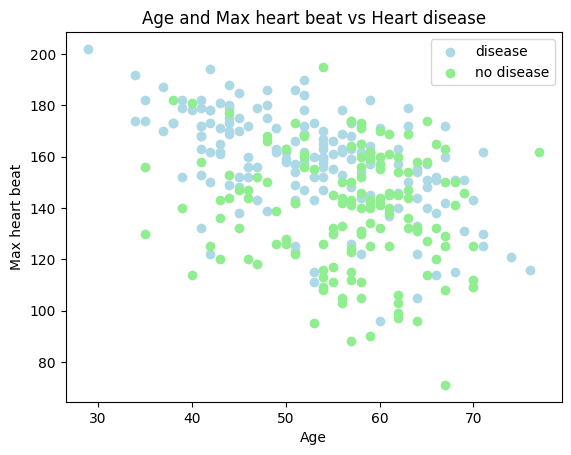

In [10]:
#Age vs Max heart rate
# plt.plot(heart.age[heart.target==1],heart.thalach[heart.target==1],color='b',linestyle='--')
plt.scatter(heart.age[heart.target==1],heart.thalach[heart.target==1],color=['lightblue'])
#Age vs Max heart rate
plt.scatter(heart.age[heart.target==0],heart.thalach[heart.target==0],color=['lightgreen'])
plt.title('Age and Max heart beat vs Heart disease')
plt.xlabel('Age')
plt.ylabel('Max heart beat')
plt.legend(['disease','no disease'])
plt.show()

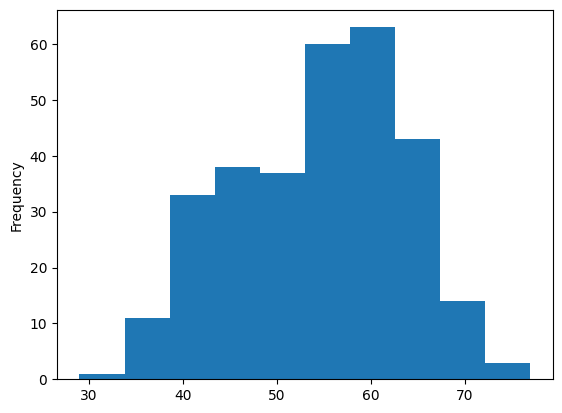

In [11]:
heart.age.plot.hist();

In [12]:
pd.crosstab(heart.cp,heart.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


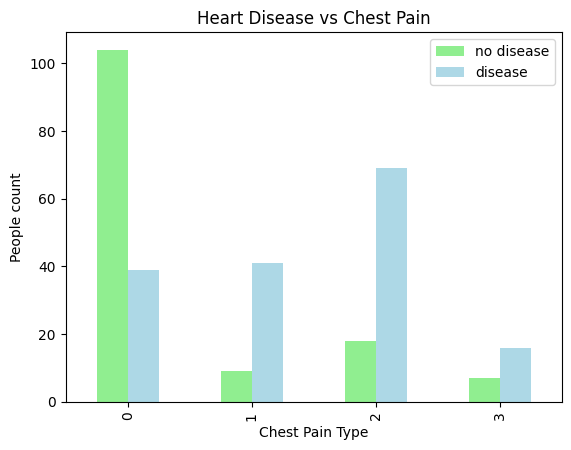

In [13]:
pd.crosstab(heart.cp,heart.target).plot(kind='bar',color=['lightgreen','lightblue'])
plt.title('Heart Disease vs Chest Pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('People count')
plt.legend(['no disease','disease'])
plt.show()

In [14]:
#correlation matrix
heart.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


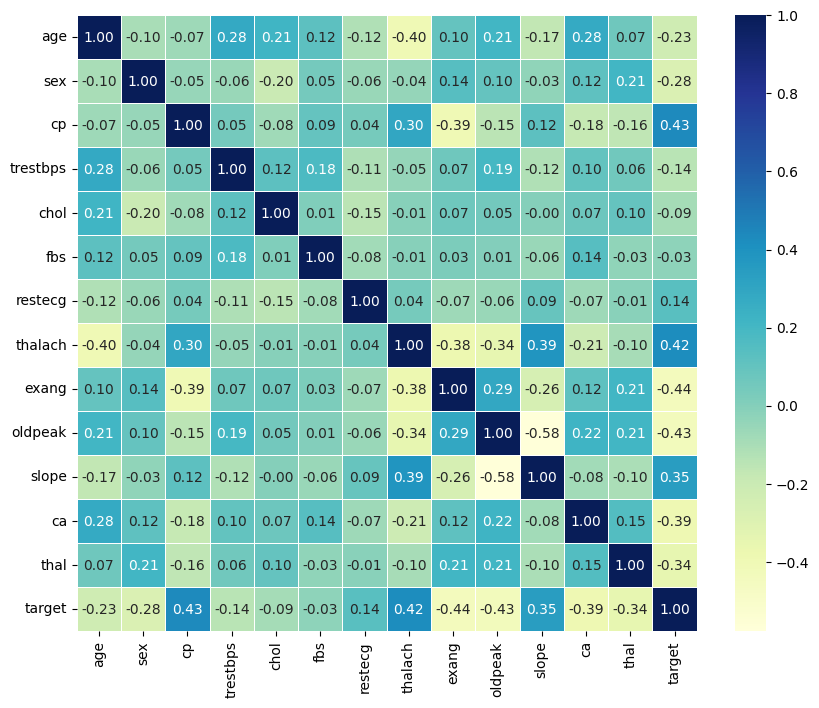

In [15]:
ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(heart.corr(),linewidth=0.5,annot=True,fmt='.2f',cmap='YlGnBu')


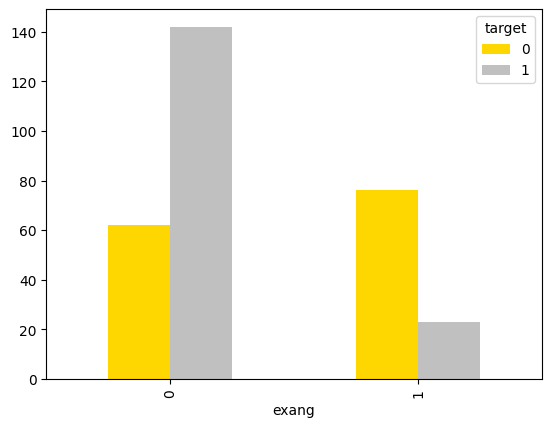

In [16]:
pd.crosstab(heart.exang,heart.target).plot(kind='bar',color=['gold','silver']);

##### Shuffling the data

In [17]:
heart=heart.sample(frac=1)
heart.index=[i for i in range(1,len(heart)+1)]
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
2,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
3,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
4,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
5,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
300,60,0,2,102,318,0,1,160,0,0.0,2,1,2,1
301,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
302,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0


#### Splitting the data
##### X- features Y- target

In [18]:
Y=heart['target']
X=heart.drop('target',axis=1)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [20]:
models={'Logistic Regression':LogisticRegression(),
       'KNN':KNeighborsClassifier(),'RandomForest':RandomForestClassifier()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    #dictionary for individual model scores
    model_scores={}
    for name,model in models.items():
        #fit the models
        model.fit(x_train,y_train)
        #storing the scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores
    
    
    

In [22]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)

C:\Users\dilip\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


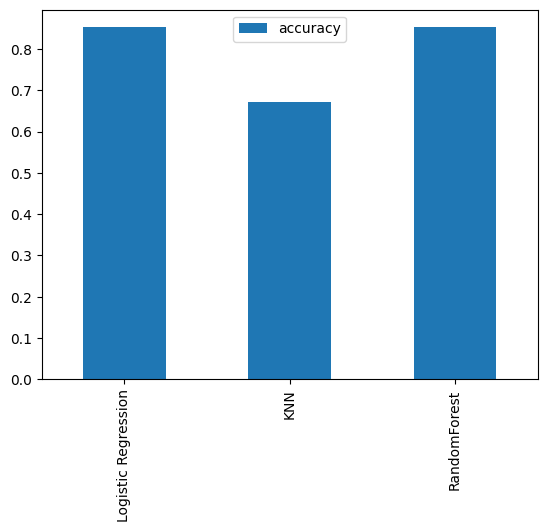

In [360]:
model_scores
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();
plt.savefig('accuracy_comparision.png')

In [42]:
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.6721311475409836,
 'RandomForest': 0.8524590163934426}

In [24]:
#hyperparameter tuning
#knn

train_scores=[]
test_scores=[]
neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [33]:
pd.DataFrame({'Train Scores':train_scores,'Test Scores':test_scores})

,Train Scores,Test Scores
0,1.000000,0.622951
1,0.789256,0.606557
2,0.772727,0.606557
3,0.772727,0.655738
4,0.739669,0.672131
5,0.739669,0.606557
6,0.710744,0.639344
7,0.710744,0.655738
8,0.714876,0.590164
9,0.698347,0.557377


Maximum knn score on the test data:67.21


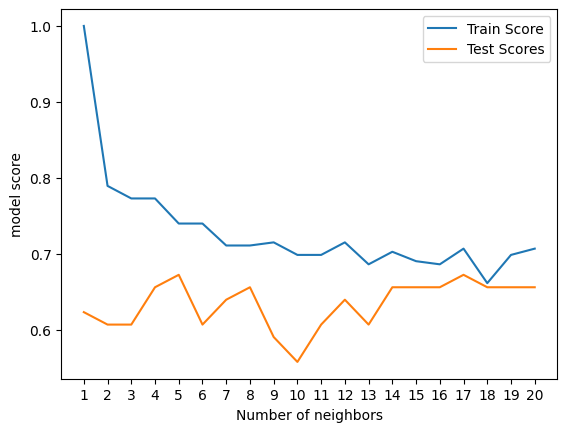

In [41]:
plt.plot(neighbors,train_scores,label='Train Score')
plt.plot(neighbors,test_scores,label='Test Scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('model score')
plt.legend()
print(f'Maximum knn score on the test data:{max(test_scores)*100:.2f}')

In [158]:
#Randomized Search CV
#logisticregression
log_reg_grid={'C':np.logspace(10,20,50), 'solver':['liblinear'],'max_iter':[100,200,300]}
#randomforesrclassifier
rf_grid={'n_estimators':np.arange(10,1000,25),'max_depth':[None,3,5,10],'min_samples_split':np.arange(2,20,2),'min_samples_leaf':np.arange(1,20,2)}

In [144]:
np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=50,verbose=True)

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([1.00000000e+10, 1.59985872e+10, 2.55954792e+10, 4.09491506e+10,
       6.55128557e+10, 1.04811313e+11, 1.67683294e+11, 2.68269580e+11,
       4.29193426e+11, 6.86648845e+11, 1.09854114e+12, 1.75751062e+12,
       2.81176870e+12, 4.49843267e+12, 7.19685673e+12, 1.15139540e+13,
       1.84206997e+1...
       5.17947468e+15, 8.28642773e+15, 1.32571137e+16, 2.12095089e+16,
       3.39322177e+16, 5.42867544e+16, 8.68511374e+16, 1.38949549e+17,
       2.22299648e+17, 3.55648031e+17, 5.68986603e+17, 9.10298178e+17,
       1.45634848e+18, 2.32995181e+18, 3.72759372e+18, 5.96362332e+18,
       9.54095476e+18, 1.52641797e+19, 2.44205309e+19, 3.90693994e+19,
       6.25055193e+19, 1.00000000e+20]),
                                        'max_iter': [100, 200, 300],
                                        'solver': ['liblinear']},
                   verbose=True)

In [150]:
print(f'Logistic regression after RSCV:{rs_log_reg.score(x_test,y_test)}')

Logistic regression after RSCV:0.8688524590163934


In [159]:
np.random.seed(42)

rf_grid=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=30,verbose=True)

rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  35,  60,  85, 110, 135, 160, 185, 210, 235, 260, 285, 310,
       335, 360, 385, 410, 435, 460, 485, 510, 535, 560, 585, 610, 635,
       660, 685, 710, 735, 760, 785, 810, 835, 860, 885, 910, 935, 960,
       985])},
                   verbose=True)

In [160]:
rf_grid.best_params_

{'n_estimators': 885,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': 3}

In [161]:
rf_grid.score(x_test,y_test)

0.8524590163934426

In [156]:
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.6721311475409836,
 'RandomForest': 0.8524590163934426}

In [176]:
#GridsearchCV
#logisticregression
log_reg_grid={'C':np.logspace(1,30,30), 'solver':['liblinear'],'max_iter':[100,200,300]}
gs_logre=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

In [177]:
gs_logre.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20, 1.e+21, 1.e+22, 1.e+23, 1.e+24,
       1.e+25, 1.e+26, 1.e+27, 1.e+28, 1.e+29, 1.e+30]),
                         'max_iter': [100, 200, 300], 'solver': ['liblinear']},
             verbose=True)

In [178]:
gs_logre.score(x_test,y_test)

0.8524590163934426

In [228]:
gs_logre.best_params_

{'C': 10.0, 'max_iter': 100, 'solver': 'liblinear'}

### Evaluation

In [181]:
y_preds=gs_logre.predict(x_test)

In [202]:
from sklearn.metrics import RocCurveDisplay 
import sklearn

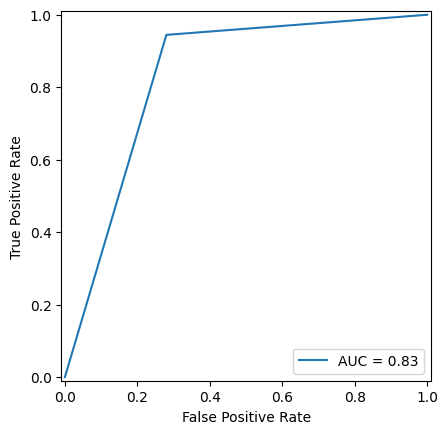

In [205]:
fpr,tpr,threshold=roc_curve(y_test,y_preds)
rauc=sklearn.metrics.auc(fpr,tpr)
disp=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=rauc)
disp.plot()

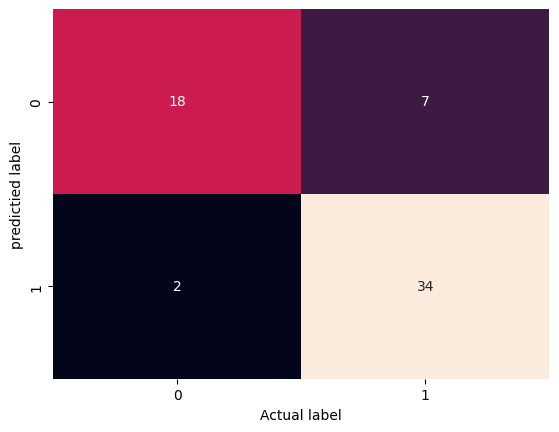

In [359]:
sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
plt.ylabel('predictied label')
plt.xlabel('Actual label')
plt.savefig('logre_confusionmatrix.png')

In [226]:
# pd.DataFrame()
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.83      0.94      0.88        36

    accuracy                           0.85        61
   macro avg       0.86      0.83      0.84        61
weighted avg       0.86      0.85      0.85        61



In [233]:
clf=LogisticRegression(C=10.0,max_iter= 100,solver= 'liblinear')
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring='accuracy')
print(np.mean(cv_acc))

0.81224043715847


In [234]:
cv_prec=cross_val_score(clf,X,Y,cv=5,scoring='precision')
print(np.mean(cv_prec))

0.7996051996051997


In [235]:
cv_rec=cross_val_score(clf,X,Y,cv=5,scoring='recall')
print(np.mean(cv_rec))

0.8787878787878787


In [236]:
cv_f=cross_val_score(clf,X,Y,cv=5,scoring='f1')
print(np.mean(cv_f))

0.8366767049375745


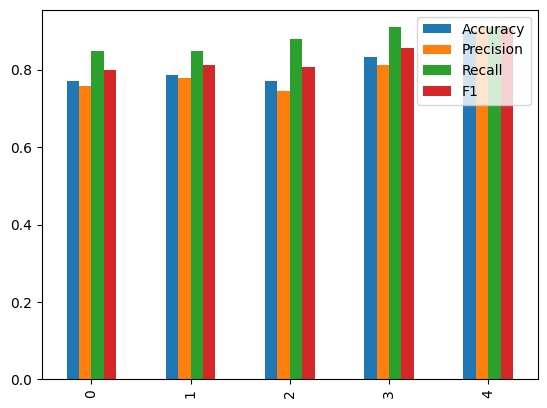

In [361]:
cv_metrics=pd.DataFrame({'Accuracy':cv_acc,'Precision':cv_prec,'Recall':cv_rec,
                        'F1':cv_f})
cv_metrics.plot.bar();
plt.savefig('cross_val_metrics.png')

## feature importance

In [250]:
clf.fit(x_train,y_train)

LogisticRegression(C=10.0, solver='liblinear')

In [257]:
clf.coef_

array([[ 0.00435299, -1.60605232,  0.80381597, -0.01357084, -0.0086058 ,
        -0.07154552,  0.4402877 ,  0.02455773, -0.81097966, -0.5322137 ,
         0.65012845, -0.68267194, -0.77267467]])

In [259]:
feature_dict=dict(zip(heart.columns,list(clf.coef_[0])))

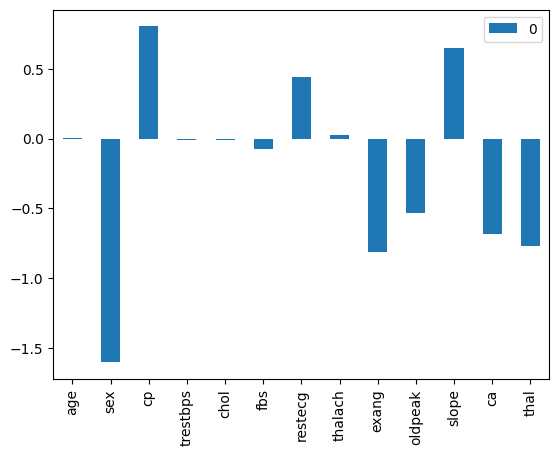

In [268]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(legend='correlation');

In [269]:
X[['age','sex','trestbps','']]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,49,1,2,118,149,0,0,126,0,0.8,2,3,2
2,58,1,0,125,300,0,0,171,0,0.0,2,2,3
3,64,1,2,125,309,0,1,131,1,1.8,1,0,3
4,74,0,1,120,269,0,0,121,1,0.2,2,1,2
5,49,1,1,130,266,0,1,171,0,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,57,1,2,150,126,1,1,173,0,0.2,2,1,3
300,60,0,2,102,318,0,1,160,0,0.0,2,1,2
301,52,1,3,118,186,0,0,190,0,0.0,1,0,1
302,63,1,0,130,330,1,0,132,1,1.8,2,3,3


71


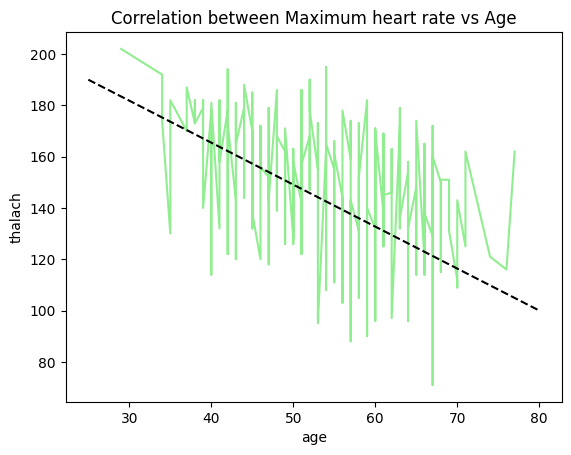

<Figure size 640x480 with 0 Axes>

In [362]:
#correlation between thalach vs Age
plt.plot(X.sort_values(by='age')['age'],X.sort_values(by='age')['thalach'],color='lightgreen')

plt.plot([25,80],[190,100],color='black',ls='--')
plt.title('Correlation between Maximum heart rate vs Age')
plt.ylabel('thalach')
plt.xlabel('age')
print(min(X['thalach']))
plt.show();
plt.savefig('max_heatbeat_age.png')

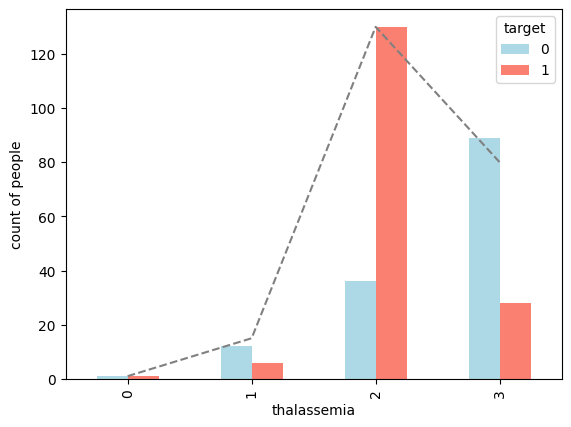

In [358]:
#relation between thal and target
pd.crosstab(X['thal'],Y).plot(kind='bar',color=['lightblue','salmon'])
plt.xlabel('thalassemia')
plt.ylabel('count of people')
plt.plot([0,1,2,3],[1,15,130,80],color='grey',ls='--');
plt.savefig('thalassemia.png')